# US Stock Market
In this notebook I look at:
* the market capitalization of listed domestic companies in the US
* the market capitalization of listed domestic companies in the US as percentage of US GDP
* the total annual value of stocks traded on US exchanges 
* the total annual value of stocks traded on US exchanges as perccentage of US GDP
* the total number of listed domestic companies in the US as well as foreign companies that are exclusively listed on US exchanges.
* the annual volatility of the subset of the market represented by the S&P 500 index
* the forward annual dividend yield of S&P 500
* the forward price to earnings ratio of S&P 500

The only publically available source of these data is [The World Bank](https://data.worldbank.org). Unfortunately it only provides data at annual granularity rather than quarterly or monthly. To compensate for it I created my own module called `stock_market.metrics` (which is part of this repository) where I calculate capitalization, turnover, forward dividend yields and volatility of an arbitrary stock market with the help of the [yfinance](https://pypi.org/project/yfinance/) module. I use it to provide metrics on a subset of the US stock market represented by companies that are part of the [S&P 500 Index](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies).

Given that the S&P 500 Index makes up approximately 80% of the US listed domestic companies, it's a pretty representative alternative. Given the amount of data that needs to be retrieved, I limit the analysis of S&P 500 to the year 2020 and onwards. I carry out the analysis at monthly granularity.

All amounts are represented in either Billions of USD or as percentage points.

In [1]:
# Uncomment if running in Google Colaboratory, otherwise the import of the curves module in the cell below will fail
#!git clone -l -s https://github.com/ilchen/US_Economic_Data_Analysis.git cloned-repo
#%cd cloned-repo

# Install the latest version of pandas-datareader and yfinance
# !pip install pandas-datareader -U
# !pip install yfinance -U

In [46]:
import pandas as pd
from pandas.tseries.offsets import YearBegin
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from pandas_datareader import wb

from datetime import date

from stock_market import metrics

In [3]:
report_start = date.fromisoformat('1959-01-01')
report_end = date.today()

In [4]:
stock_mkt = wb.download(indicator=['CM.MKT.LCAP.CD', 'CM.MKT.LCAP.GD.ZS', 'CM.MKT.TRAD.CD', 'CM.MKT.TRAD.GD.ZS',
                                   'CM.MKT.TRNR', 'CM.MKT.LDOM.NO'],
                        country='US', start=report_start, end=report_end).loc['United States'].dropna(how='all')
stock_mkt.index = pd.to_datetime(stock_mkt.index).shift(1, 'A')
stock_mkt = stock_mkt.asfreq('A')

# Convert into billions of USD
stock_mkt.loc[:, ['CM.MKT.LCAP.CD', 'CM.MKT.TRAD.CD']] /= 1e9

# Convert to percentage points
stock_mkt.loc[:, ['CM.MKT.LCAP.GD.ZS', 'CM.MKT.TRAD.GD.ZS', 'CM.MKT.TRNR']] /= 100.

In [5]:
ts = pd.to_datetime('2023-12-31')
if stock_mkt.index[-1] < ts:
    # Small adjustment for not yet published data for US market capitalization at the end of 2023
    stock_mkt.loc[ts, 'CM.MKT.LCAP.CD'] = 50781.6975
    gdp = web.get_data_fred('GDPA', start=report_start, end=report_end)
    gdp.index = gdp.index.shift(1, 'A')
    gdp = gdp.asfreq('A')
    stock_mkt.loc[ts, 'CM.MKT.LCAP.GD.ZS'] = stock_mkt.loc[ts, 'CM.MKT.LCAP.CD'] / gdp.GDPA.loc[ts]

In [6]:
# Human readable column names for DataFrames
MKT_CAP = 'Market capitalization of listed domestic companies'
MKT_CAP_TO_GDP = MKT_CAP + ' (% of GDP)'
MKT_CAP_GRAPH_TITLE = 'US ' + MKT_CAP
MKT_CAP_SP500 = 'Market capitalization of S&P 500 companies'
MKT_CAP_SP500_TO_GDP = MKT_CAP_SP500 + ' (% of GDP)'
MKT_CAP_TOP10_SP500 = 'Top-10 S&P 500 companies by market capitalization and their share of S&P 500'
TRAD_VOL = 'Stocks traded, total value'
TRAD_VOL_TO_GDP = TRAD_VOL + ' (% of GDP)'
TRAD_VOL_GRAPH_TITLE = 'US ' + TRAD_VOL + ' (annual)'
TRAD_VOL_SP500_GRAPH_TITLE = 'S&P 500 ' + TRAD_VOL + ' (annualized)'
TRAD_VOL_SP500_GRAPH_TITLE_DAILY = 'S&P 500 ' + TRAD_VOL + ' (average daily)'
TUROVER_RATIO = 'Turnover ratio of domestic shares (%)'
TUROVER_RATIO_GRAPH_TITLE = 'US Stocks traded, Annual ' + TUROVER_RATIO
TUROVER_RATIO_SP500 = 'Turnover ratio of S&P 500 companies (%)'
TUROVER_RATIO_SP500_GRAPH_TITLE = 'Stocks traded, Annual ' + TUROVER_RATIO_SP500
TUROVER_RATIO_SP500_DAILY_GRAPH_TITLE = 'Stocks traded, Daily ' + TUROVER_RATIO_SP500
VOLATILITY_SP500 = 'Volatility of S&P 500'
NUM_LISTED_DOMESTIC = 'Number of listed domestic companies'
NUM_LISTED_DOMESTIC_GRAPH_TITLE = 'US Listed domestic companies, total'

# Y axis labels for graphs
LEFT_Y_AXIS_LABEL = 'Billions of USD'
RIGHT_Y_AXIS_LABEL = '% of GDP'

In [7]:
stock_mkt.rename(
    columns={'CM.MKT.LCAP.CD': MKT_CAP, 'CM.MKT.LCAP.GD.ZS': MKT_CAP_TO_GDP,
             'CM.MKT.TRAD.CD': TRAD_VOL, 'CM.MKT.TRAD.GD.ZS': TRAD_VOL_TO_GDP,
             'CM.MKT.TRNR': TUROVER_RATIO, 'CM.MKT.LDOM.NO': NUM_LISTED_DOMESTIC},
    inplace=True)

In the below table **_Stocks traded, total value_** represents a cumulative annual amount of all transactions in listed domestic US equities.

In [8]:
pd.options.display.float_format = (lambda x: '{:.2%}'.format(x) if x < 5 else '${:,.2f}bn'.format(x))
pd.options.display.max_rows = 40
stock_mkt.iloc[:,:4]

,Market capitalization of listed domestic companies,Market capitalization of listed domestic companies (% of GDP),"Stocks traded, total value","Stocks traded, total value (% of GDP)"
year,,,,
1975-12-31,$703.80bn,41.77%,$137.28bn,8.15%
1976-12-31,$883.10bn,47.14%,$173.32bn,9.25%
1977-12-31,$834.24bn,40.07%,$165.87bn,7.97%
1978-12-31,$861.96bn,36.65%,$225.84bn,9.60%
1979-12-31,$993.59bn,37.82%,$271.85bn,10.35%
...,...,...,...,...
2019-12-31,"$34,085.73bn",159.42%,"$36,342.31bn",169.97%
2020-12-31,"$41,569.86bn",197.38%,"$41,086.46bn",195.09%
2021-12-31,"$48,548.54bn",208.23%,"$45,874.15bn",196.76%


For the S&P 500 index I obtain data directly from Yahoo-Finance. For a current list of S&P 500 constituent companies I use Wikipedia. The index actually contains 503 stocks since it includes two share classes of stock from 3 of its component companies.

In the `stock_market.metrics` module (which is part of this repository), I reconstruct the historical composition of the S&P 500 Index all the way to the start of 2020 based on my analysis of the changes to [the list of S&P 500 companies published on Wikipedia](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies#Selected_changes_to_the_list_of_S&P_500_components), which you can see in [this csv file](./stock_market/sp500_changes_since_2019.csv). For retrieving historical closing prices and volumes of delisted stocks I made use of [Alpha Vantage APIs](https://www.alphavantage.co/documentation/), which requires an API key to call. I saved retrived closing prices and volumes of delisted shares in the `csv` format as part of this repository to obviate the need to call this rate-limited API. I do a lot of heavy lifting in the `stock_market.metrics.Matrics` class to repair an occasionally incorrect number of shares outstanding reported by `yfinance` as well as needless adjustment for stock splits that Yahoo-Finance reports in unadjusted close prices.

In [9]:
start = date(2020, 1, 1)
sp500_hist_comps = metrics.USStockMarketMetrics.get_sp500_historical_components(start)
sp500_hist_shares_outs = metrics.USStockMarketMetrics.get_sp500_historical_shares_outstanding()
sp500_metrics = metrics.USStockMarketMetrics(sp500_hist_comps, start=start, hist_shares_outs=sp500_hist_shares_outs)

[*********************100%%**********************]  574 of 574 completed

24 Failed downloads:
['INFO', 'WCG', 'CTXS', 'AGN', 'XEC', 'CXO', 'DISH', 'VAR', 'TWTR', 'CERN', 'DRE', 'PBCT', 'DISCK', 'ETFC', 'ALXN', 'TIF', 'ATVI', 'RTN', 'KSU', 'NLSN', 'XLNX', 'MXIM', 'FLIR', 'NBL']: Exception('%ticker%: No timezone found, symbol may be delisted')


Adjusting closing prices before the split date on 2021-06-29 for CSX
Adjusting closing prices before the split date on 2021-02-16 for FTI
Adjusting closing prices before the split date on 2022-06-13 for DXCM
Adjusting closing prices before the split date on 2020-08-31 for AAPL
Adjusting closing prices before the split date on 2022-01-24 for SLG
Adjusting closing prices before the split date on 2021-10-05 for ISRG
Adjusting closing prices before the split date on 2020-12-01 for MKC
Adjusting closing prices before the split date on 2020-03-02 for TT
Adjusting closing prices before the split date on 2021-07-20 for NVDA
Adjusting closing prices before the split date on 2024-02-26 for WMT
Adjusting closing prices before the split date on 2024-02-20 for COO
Adjusting closing prices before the split date on 2020-07-01 for MTCH
Adjusting closing prices before the split date on 2020-11-17 for PFE
Adjusting closing prices before the split date on 2020-06-01 for EW
Adjusting closing prices before

[*********************100%%**********************]  1 of 1 completed


In [10]:
# Convert into billions of USD
sp500_capitalization = sp500_metrics.get_capitalization(frequency='MS') / 1e9
sp500_annual_trading_value = sp500_metrics.get_annual_trading_value(frequency='MS') / 1e9
sp500_daily_trading_value = sp500_metrics.get_daily_trading_value(frequency='MS') / 1e9

# The following three are already expressed in percentage points
sp500_daily_turnover = sp500_metrics.get_daily_turnover(frequency='MS')
sp500_annual_turnover = sp500_metrics.get_annual_turnover(frequency='MS')
sp500_volatility = sp500_metrics.get_annual_volatility(frequency='MS')

In [11]:
# Upsampling to monthly frequencies to match the frequency of S&P 500 metrics
gdp = web.get_data_fred('GDP', start=start, end=report_end).GDP.resample('MS').ffill()
missing_months = sp500_capitalization.index.difference(gdp.index)
gdp = pd.concat([gdp, pd.Series(np.nan, index=missing_months)]).sort_index().ffill()

In [12]:
stock_mkt_sp500 = pd.concat([sp500_capitalization, sp500_capitalization / gdp,
                             sp500_annual_trading_value, sp500_annual_trading_value / gdp,
                             sp500_daily_turnover, sp500_volatility], axis=1)
stock_mkt_sp500.columns = [MKT_CAP_SP500, MKT_CAP_SP500_TO_GDP, TRAD_VOL, TRAD_VOL_TO_GDP,
                           TUROVER_RATIO_SP500, VOLATILITY_SP500]
stock_mkt_sp500.dropna(inplace=True)

In the below table **_Stocks traded, total value_** represents a cumulative annual amount of all transactions in  equities that are part of the S&P 500 Index. **_Turnover ratio of S&P 500 companies_** represents the percentage of shares outstanding that are traded per day.

In [13]:
stock_mkt_sp500

,Market capitalization of S&P 500 companies,Market capitalization of S&P 500 companies (% of GDP),"Stocks traded, total value","Stocks traded, total value (% of GDP)",Turnover ratio of S&P 500 companies (%),Volatility of S&P 500
Date,,,,,,
2020-01-01,"$28,240.88bn",130.10%,"$43,521.97bn",200.50%,0.61%,9.15%
2020-02-01,"$28,155.06bn",129.71%,"$51,406.33bn",236.82%,0.74%,15.00%
2020-03-01,"$22,780.89bn",104.95%,"$73,095.10bn",336.74%,1.29%,64.11%
2020-04-01,"$23,713.88bn",119.09%,"$54,212.98bn",272.25%,0.91%,66.15%
2020-05-01,"$25,040.93bn",125.75%,"$50,803.38bn",255.12%,0.80%,42.98%
...,...,...,...,...,...,...
2023-12-01,"$41,113.33bn",147.06%,"$68,920.98bn",246.52%,0.67%,10.78%
2024-01-01,"$42,191.88bn",150.92%,"$72,327.48bn",258.71%,0.68%,10.23%
2024-02-01,"$43,940.93bn",157.17%,"$76,782.95bn",274.65%,0.69%,11.69%


## Market capitalization of listed domestic companies and its ratio to GDP
These measures allow to assess how overpriced the US stock market is. When the market capitalization in a given economy is more or less the same as the GDP, the market is considered fairly priced, higher capitalizations are deemed expensive. However, different markets have different norms of what is cheap or expensive when it comes to stock market capitalization to GDP ratios. The US stock market receives an extra premium thanks to its remarkable historical growth, high standards of corporate governanance, high volumes and liquidity.

**NB**: the market capitalzaion to GDP ratio only tells how cheap or expensive the overall stock market is. Even when the whole market is overpriced, it can contain adequately priced individual stocks.

Market capitalization values provided for a given year represent the weighted average capitalization of US listed domestic companies accross all trading days in that year. All dollar amounts are nominal, i.e. without adjustments for inflation.

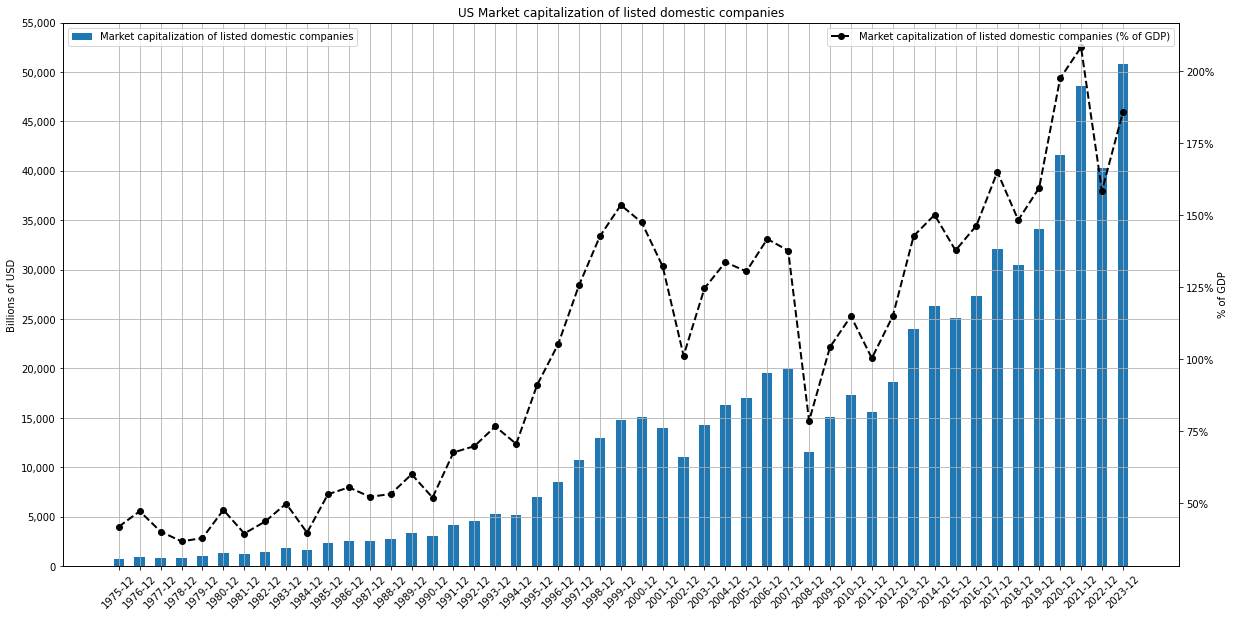

In [14]:
fig, ax = plt.subplots(figsize=(20, 10))
ax2 = ax.twinx()
ax.bar(x=range(len(stock_mkt)), height=stock_mkt.iloc[:,0], color='#1f77b4', width=0.5, label=MKT_CAP)
ax2.plot(range(len(stock_mkt)), stock_mkt.iloc[:,1], color='k', marker='o', label=MKT_CAP_TO_GDP,
         linestyle='--', linewidth=2)
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.title.set_text(MKT_CAP_GRAPH_TITLE)
ax.grid(True)
_ = ax.set_xticks(range(len(stock_mkt)), stock_mkt.index)
_ = ax.set_xticklabels(stock_mkt.index.strftime('%Y-%m'), rotation=45)
ax.set_yticks(np.arange(0, 56000, 5000))
ax.set_ylabel(LEFT_Y_AXIS_LABEL)
ax.yaxis.set_major_formatter('{x:,.0f}')
ax2.set_ylabel(RIGHT_Y_AXIS_LABEL)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))

### Market capitalization of listed domestic companies that are part of S&P 500 Index and its ratio to GDP
This is almost the same as the above graph except that here I limit the analysis to the subset of US listed equities that are part of the S&P 500 Index. This is approximately 80% of the total US listed domestic companies. Given my own implementation in the `stock_market.metrics` module, I am able to carry out this analysis at monthly frequences, including the most recent month.

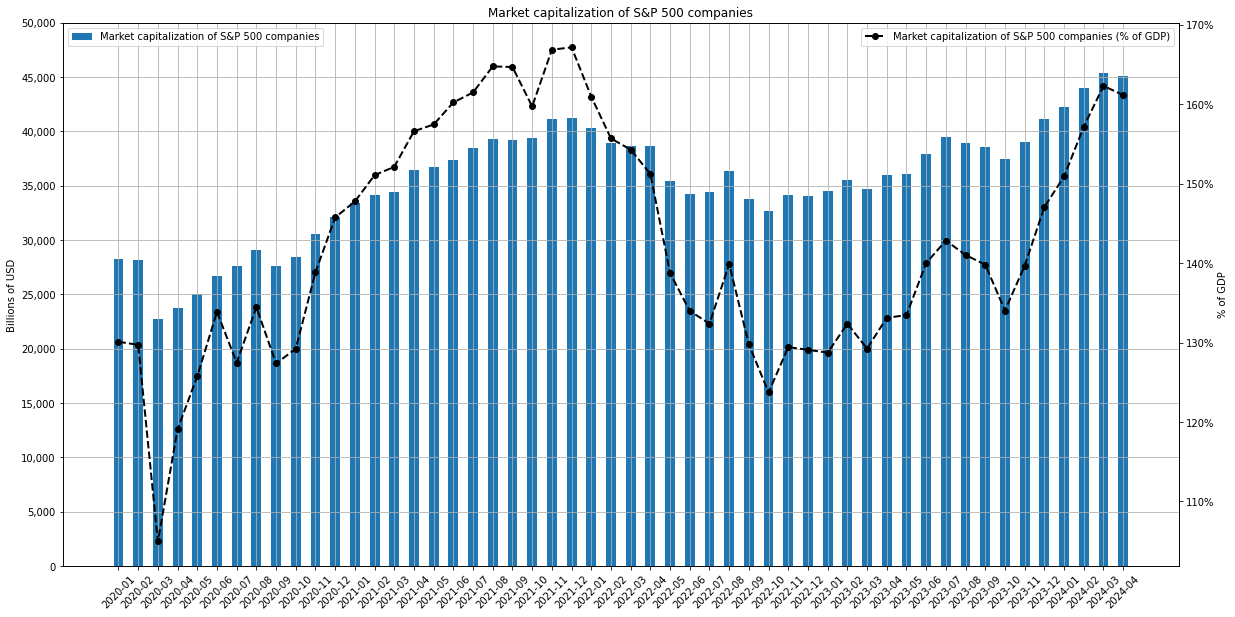

In [15]:
fig, ax = plt.subplots(figsize=(20, 10))
ax2 = ax.twinx()
ax.bar(x=range(len(stock_mkt_sp500)), height=stock_mkt_sp500.iloc[:,0], color='#1f77b4',
       width=0.5, label=MKT_CAP_SP500)
ax2.plot(range(len(stock_mkt_sp500)), stock_mkt_sp500.iloc[:,1], color='k', marker='o',
         label=MKT_CAP_SP500_TO_GDP, linestyle='--', linewidth=2)
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.title.set_text(MKT_CAP_SP500)
ax.grid(True)
_ = ax.set_xticks(range(len(stock_mkt_sp500)), stock_mkt_sp500.index)
_ = ax.set_xticklabels(stock_mkt_sp500.index.strftime('%Y-%m'), rotation=45)
ax.set_yticks(np.arange(0, 51000, 5000))
ax.set_ylabel(LEFT_Y_AXIS_LABEL)
ax.yaxis.set_major_formatter('{x:,.0f}')
ax2.set_ylabel(RIGHT_Y_AXIS_LABEL)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))

### Top-10 S&P 500 companies by their capitalization and their share in the overall capitalization of S&P 500
It is freqently observed that capitalization of S&P 500 is highly concentrated in its top 6 constituent companies by market capitalization. There's even sometimes talk of S&P 494 where the top 6 companies are excluded. In this part of the notebook I looking at the capitalization of the top 10 S&P 500 constituent companies by market capitaliation. **NB:** Since Alphabet Inc is represented in the index twice given its different Class A `GOOGL` and Class C `GOOG` stocks, please bear in mind that in the analysis below I look at individual stocks rather than companies.

In [69]:
top10_today = sp500_metrics.get_top_n_capitalization_companies_for_day(10)
top10_last_month = sp500_metrics.get_top_n_capitalization_companies_for_month(
    10, sp500_metrics.data.index[-1] - pd.DateOffset(months=+1))
top10_2023 = sp500_metrics.get_top_n_capitalization_companies_for_year(10, date(2023, 1, 1))
top10_2022 = sp500_metrics.get_top_n_capitalization_companies_for_year(10, date(2022, 1, 1))
top10_2021 = sp500_metrics.get_top_n_capitalization_companies_for_year(10, date(2021, 1, 1))
top10_2020 = sp500_metrics.get_top_n_capitalization_companies_for_year(10, date(2020, 1, 1))

In [70]:
# Convert into Billions of USD
top10 = pd.concat([top10_2020.Capitalization, top10_2021.Capitalization,
                   top10_2022.Capitalization, top10_2023.Capitalization, top10_today.Capitalization], axis=1) / 1e9
top10.columns = [sp500_metrics.CAPITALIZATION + sfx
                 for sfx in [' in 2020', ' in 2021', ' in 2022', ' in 2023', ' now']]
top10_pct = pd.concat([top10_2020.iloc[:,1], top10_2021.iloc[:,1], top10_2022.iloc[:,1],
                       top10_2023.iloc[:,1], top10_today.iloc[:,1]], axis=1)

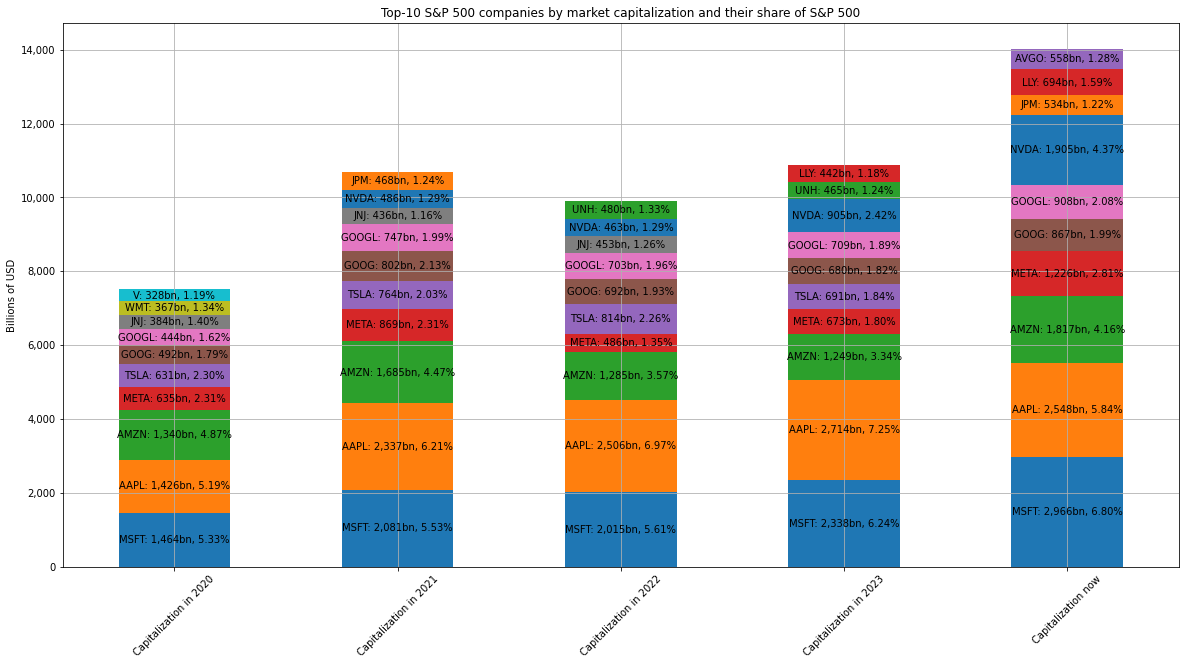

In [71]:
ax = top10.T.plot.bar(figsize=(20,10), grid=True, title=MKT_CAP_TOP10_SP500,
                      stacked=True, rot=45, ylabel=LEFT_Y_AXIS_LABEL)
ax.yaxis.set_major_formatter('{x:,.0f}')
ax.get_legend().remove()
for c in ax.containers:
    labels = [c.get_label() + f': {a:,.0f}bn, {top10_pct.loc[c.get_label()].iloc[i]:.2%}'
              if a else '' for i, a in enumerate(c.datavalues)]
    ax.bar_label(c, labels=labels, label_type="center")

In [72]:
top10_now = pd.concat([top10_last_month.Capitalization, top10_today.Capitalization], axis=1) / 1e9
top10_now.columns = [sp500_metrics.CAPITALIZATION + sfx for sfx in [' last month', ' now']]
top10_today_pct = pd.concat([top10_last_month.iloc[:,1], top10_today.iloc[:,1]], axis=1)

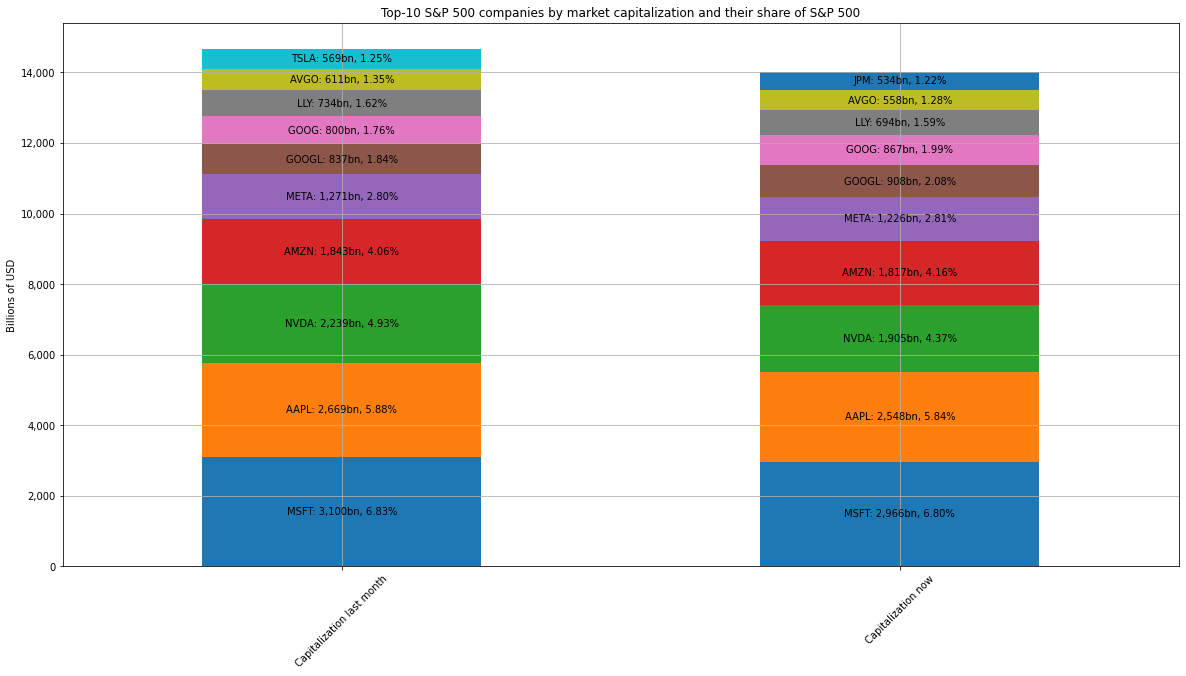

In [74]:
ax = top10_now.T.plot.bar(figsize=(20,10), grid=True, title=MKT_CAP_TOP10_SP500,
                          stacked=True, rot=45, ylabel=LEFT_Y_AXIS_LABEL)
ax.yaxis.set_major_formatter('{x:,.0f}')
ax.get_legend().remove()
for c in ax.containers:
    labels = [c.get_label() + f': {a:,.0f}bn, {top10_today_pct.loc[c.get_label()].iloc[i]:.2%}'
              if a else '' for i, a in enumerate(c.datavalues)]
    ax.bar_label(c, labels=labels, label_type="center")

In [75]:
print(f'The Top-10 S&P 500 constituent companies in S&P 500 make up {top10_today.iloc[:,1].sum():.2%} of the index')

The Top-10 S&P 500 constituent companies in S&P 500 make up 32.14% of the index


Since Alphabet Inc is represented in the index twice given its different Class A 'GOOGL' and Class C 'GOOG' stocks, in the below I need to look for the top 7 stocks to get the top 6 companies.

In [76]:
print(f'The Top-6 S&P 500 constituent companies in S&P 500 make up {top10_today.iloc[:7,1].sum():.2%} of the index')

The Top-6 S&P 500 constituent companies in S&P 500 make up 28.05% of the index


## Total annual value of stocks traded on US exchanges and its ratio to GDP
I this section of the notebook I look at the total value of domestic and foreign stocks traded on US exchanges in the whole year. The total value is total volume &times; matching prices. If you want to approximate the daily trading value, please divide the annual value by 252, which is an approximation for the number of trading days in the US. All dollar amounts are nominal, i.e. without adjustments for inflation. I also plot the ratio of annual trading volumes to annual GDP.

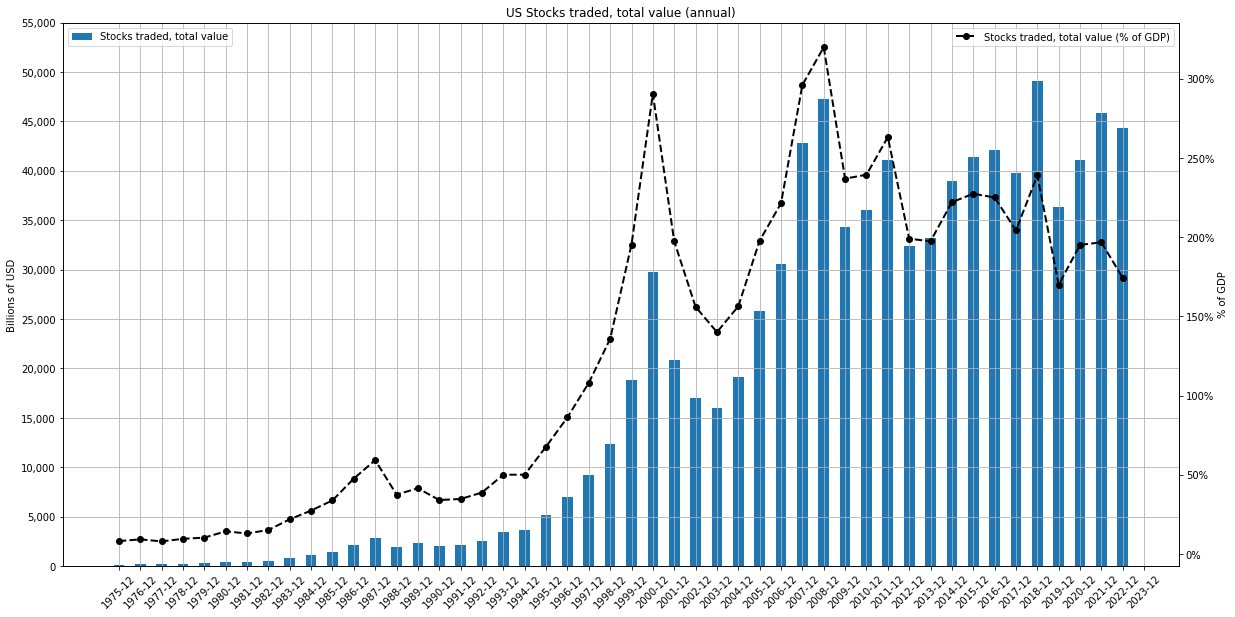

In [77]:
fig, ax = plt.subplots(figsize=(20, 10))
ax2 = ax.twinx()
ax.bar(x=range(len(stock_mkt)), height=stock_mkt.iloc[:,2], color='#1f77b4', width=0.5, label=TRAD_VOL)
ax2.plot(range(len(stock_mkt)), stock_mkt.iloc[:,3], color='k', marker='o', label=TRAD_VOL_TO_GDP,
         linestyle='--', linewidth=2)
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.title.set_text(TRAD_VOL_GRAPH_TITLE)
ax.grid(True)
_ = ax.set_xticks(range(len(stock_mkt)), stock_mkt.index)
_ = ax.set_xticklabels(stock_mkt.index.strftime('%Y-%m'), rotation=45)
ax.set_yticks(np.arange(0, 56000, 5000))
ax.set_ylabel(LEFT_Y_AXIS_LABEL)
ax.yaxis.set_major_formatter('{x:,.0f}')
ax2.set_ylabel(RIGHT_Y_AXIS_LABEL)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))

### Total annual value of S&P 500 stocks traded and its ratio to GDP
For S&P 500 I depict average daily trading values over each month. In the first graph I show average daily volumes per month, in the second I show average daily volues per month scaled to annual ammounts.

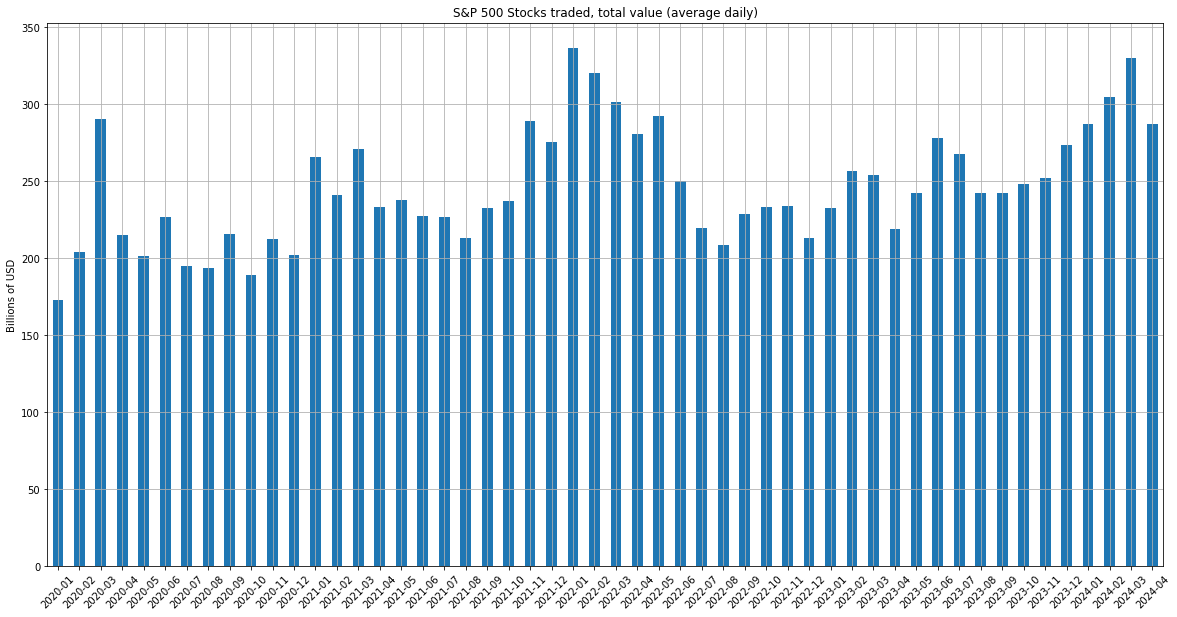

In [78]:
ax = sp500_daily_trading_value.plot.bar(figsize=(20,10), grid=True, ylabel=LEFT_Y_AXIS_LABEL,
                                        title=TRAD_VOL_SP500_GRAPH_TITLE_DAILY, color='#1f77b4',
                                        xlabel='', rot=45)
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, sp500_daily_trading_value.index)))

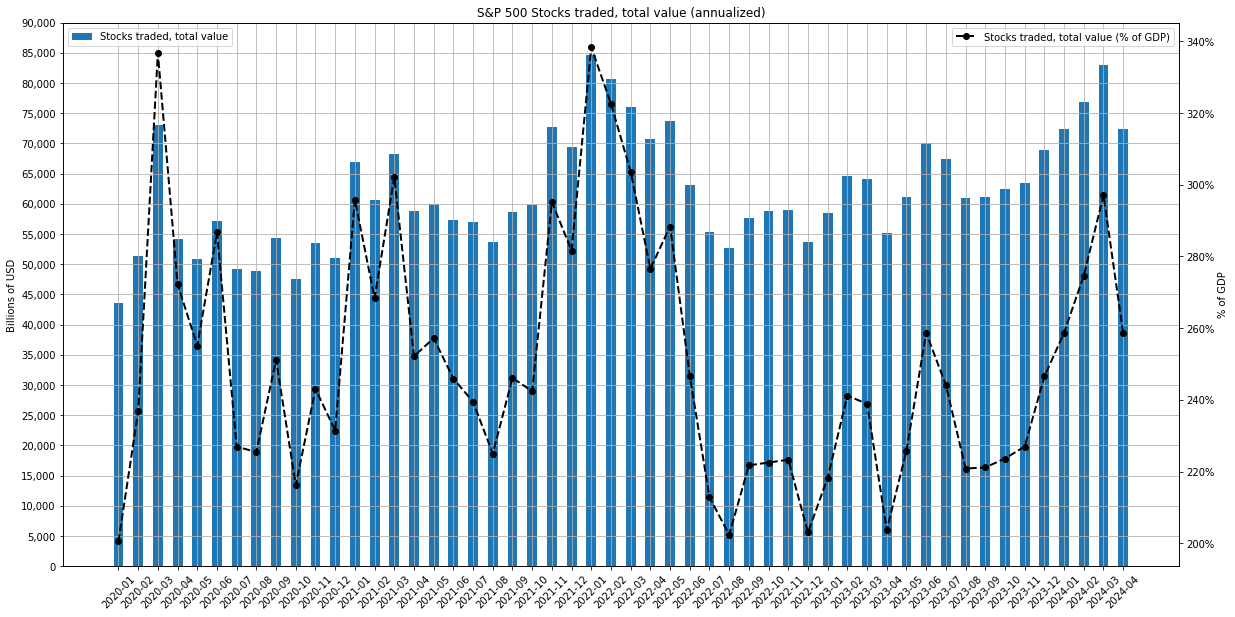

In [79]:
fig, ax = plt.subplots(figsize=(20, 10))
ax2 = ax.twinx()
ax.bar(x=range(len(stock_mkt_sp500)), height=stock_mkt_sp500.iloc[:,2], color='#1f77b4', width=0.5, label=TRAD_VOL)
ax2.plot(range(len(stock_mkt_sp500)), stock_mkt_sp500.iloc[:,3], color='k', marker='o', label=TRAD_VOL_TO_GDP,
         linestyle='--', linewidth=2)
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.title.set_text(TRAD_VOL_SP500_GRAPH_TITLE)
ax.grid(True)
_ = ax.set_xticks(range(len(stock_mkt_sp500)), stock_mkt_sp500.index)
_ = ax.set_xticklabels(stock_mkt_sp500.index.strftime('%Y-%m'), rotation=45)
ax.set_yticks(np.arange(0, 91000, 5000))
ax.set_ylabel(LEFT_Y_AXIS_LABEL)
ax.yaxis.set_major_formatter('{x:,.0f}')
ax2.set_ylabel(RIGHT_Y_AXIS_LABEL)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))

## Stocks traded, annual turnover ratio of domestic shares to capitalization
In this section of the notebook I look at the turnover ratio of domestic shares traded divided by their market capitalization. The value is annualized by multiplying the monthly average by 12. Unfortunately the World Bank doesn't contain newer datum than 2017.

The graph depicts the total domestic value of share trading of American Stock Exchange, New York Stock Exchange, NASDAQ Stock Market and BATS Global Markets divided by the total domestic market capitalization of American Stock Exchange, New York Stock Exchange and NASDAQ Stock Market.

If you divide the number for a given year by 252 (the approximate number of trading days in the US), you obtain the percentage of domestic listed shares that are traded in one day. This ranges between 0.2% and 1.7%. And such small fraction of traded shares determine the capitalization of the whole firm.

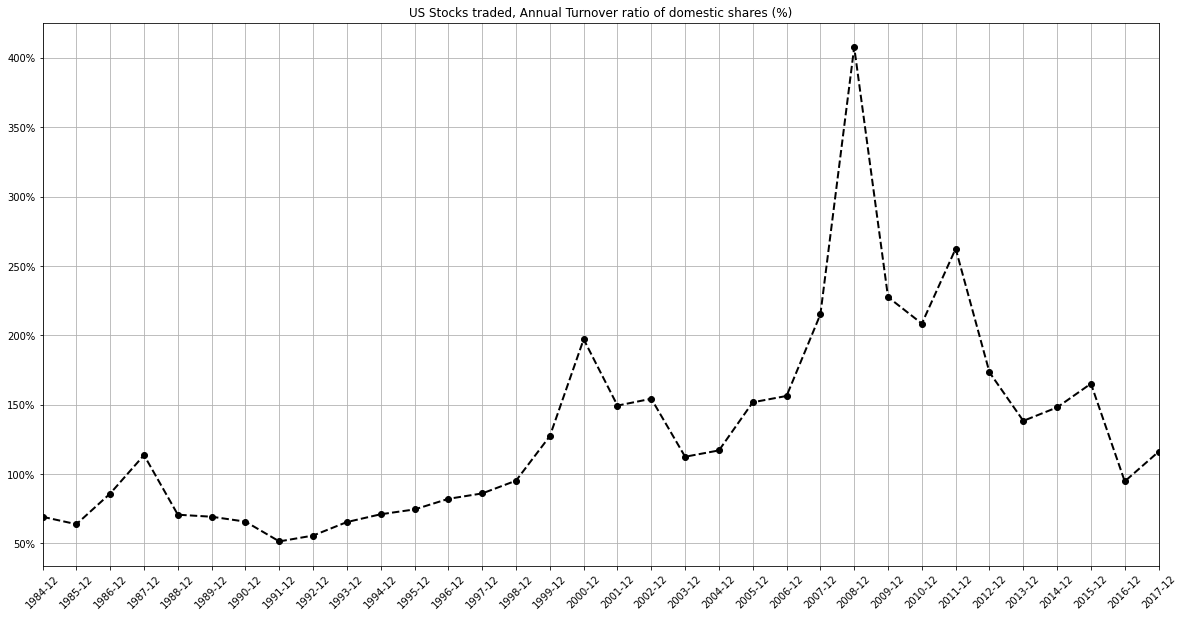

In [80]:
turnover_ratio = stock_mkt.iloc[:,4].dropna()
ax = turnover_ratio.dropna().plot(figsize=(20,10), grid=True,
                                  title=TUROVER_RATIO_GRAPH_TITLE, color='k', marker='o', linestyle='--', linewidth=2,
                                  xticks=turnover_ratio.index, xlabel='', rot=45)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, turnover_ratio.index)))

In [81]:
print('Approximately between {:.2%} and {:.2%} of domestic shares are traded daily on US exchanges'.format(
    turnover_ratio.min() / 252, turnover_ratio.max() / 252))

Approximately between 0.20% and 1.62% of domestic shares are traded daily on US exchanges


### Stocks traded, annual and daily turnover ratio of S&P 500 shares to capitalization

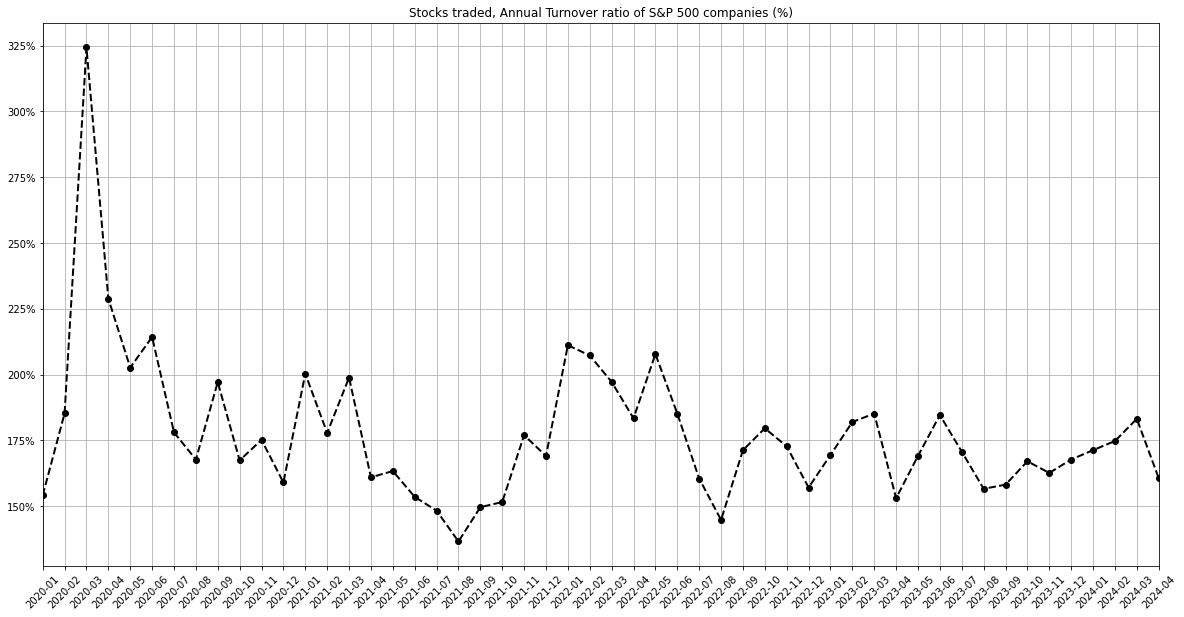

In [82]:
ax = sp500_annual_turnover.plot(figsize=(20,10), grid=True,
                                title=TUROVER_RATIO_SP500_GRAPH_TITLE, color='k', marker='o', linestyle='--',
                                linewidth=2, xticks=sp500_annual_turnover.index, xlabel='', rot=45)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, sp500_annual_turnover.index)))

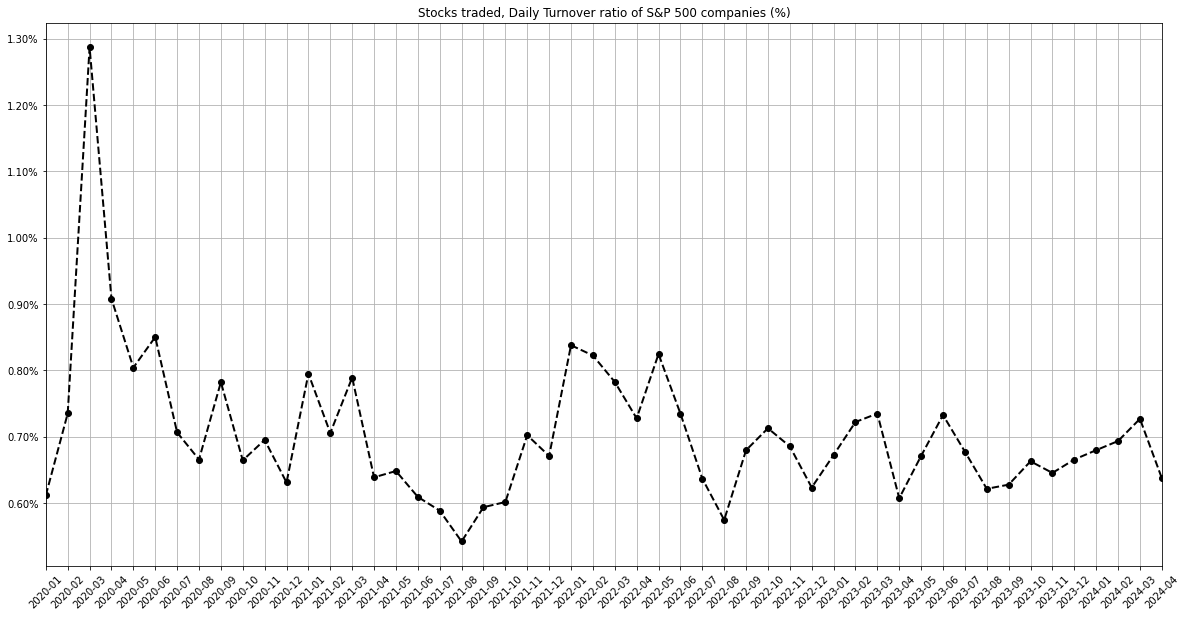

In [83]:
ax = sp500_daily_turnover.plot(figsize=(20,10), grid=True,
                               title=TUROVER_RATIO_SP500_DAILY_GRAPH_TITLE, color='k', marker='o', linestyle='--',
                               linewidth=2, xticks=sp500_daily_turnover.index, xlabel='', rot=45)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, sp500_daily_turnover.index)))

## Total number of listed domestic companies
In this section of the notebook I look at the total number of listed domestic US companies, including foreign companies which are exclusively listed in the US. Counted are those companies which have shares listed on a US exchange at the end of the year. Investment funds, unit trusts, and companies whose only business goal is to hold shares of other listed companies, such as holding companies and investment companies, regardless of their legal status, are excluded. A company with several classes of shares is counted once. Only companies admitted to listing on US exchanges are included.

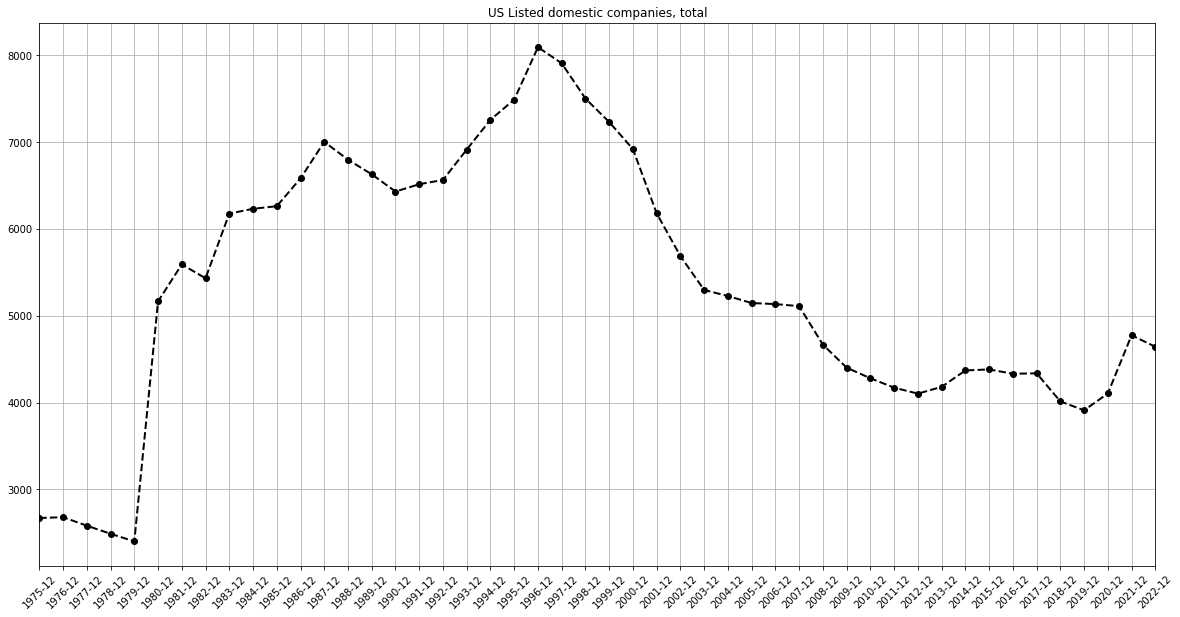

In [84]:
num_domestic_listed = stock_mkt.iloc[:,5].dropna()
ax = num_domestic_listed.dropna().plot(figsize=(20,10), grid=True,
                                       title=NUM_LISTED_DOMESTIC_GRAPH_TITLE, color='k', marker='o', linestyle='--',
                                        linewidth=2, xticks=num_domestic_listed.index, xlabel='', rot=45)
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, num_domestic_listed.index)))

## Volatility of a subset of US Stock Market represented by S&P 500 companies
In this section of the notebook I look at the annual volatility of the subset of the US Stock Market represented by companies that are part of the S&P 500 index. I use an exponentially weighted moving average approach to calculating volatility with a &lambda; = 0.94453.

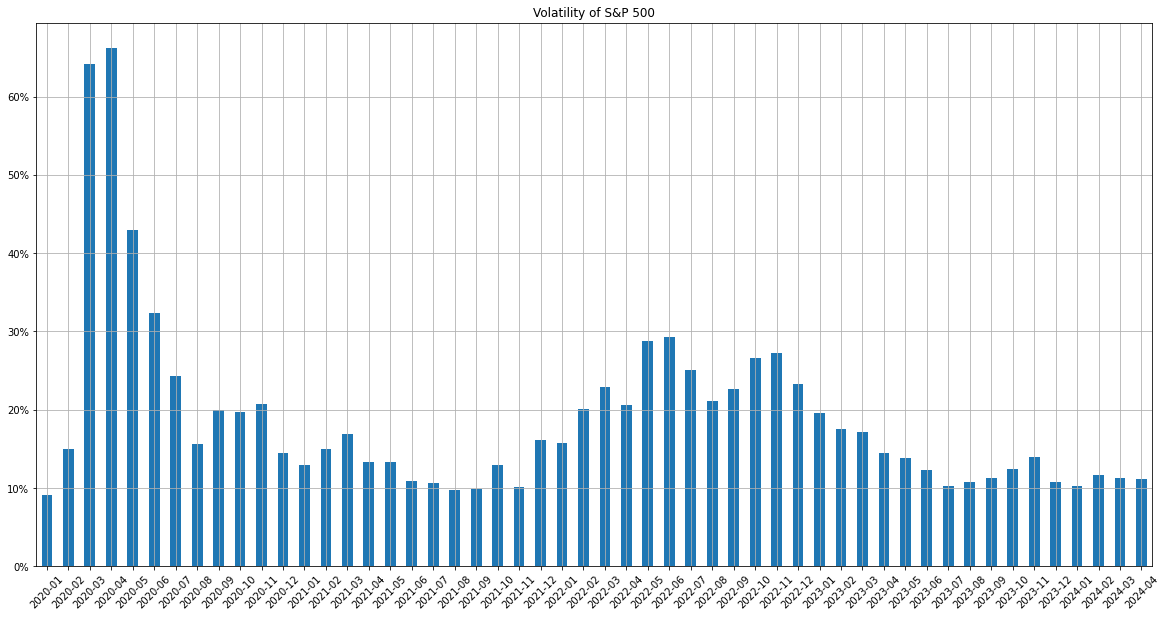

In [85]:
ax = sp500_volatility.plot.bar(figsize=(20,10), grid=True, title=VOLATILITY_SP500, xlabel='', rot=45)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, sp500_volatility.index)))

## Forward annual dividend yield of a subset US Stock Market represented by S&P 500 companies

In [86]:
print(f'S&P 500 forward dividend yield on {sp500_metrics.data.index[-1]:%Y-%m-%d} is '
      f'{sp500_metrics.forward_dividend_yield:.5%}')

S&P 500 forward dividend yield on 2024-04-19 is 1.46269%


## Forward Price to Earnings ratio of a subset US Stock Market represented by S&P 500 companies

In [87]:
print(f'S&P 500 forward P/E on {sp500_metrics.data.index[-1]:%Y-%m-%d} is '
      f'{sp500_metrics.forward_PE:.2f}')

S&P 500 forward P/E on 2024-04-19 is 21.73
